In [1]:
import os
from pathlib import Path
import sys
base_dir = Path(os.path.dirname(os.path.realpath("__file__"))).parent.parent
sys.path.insert(0, str(base_dir))
import earthnet_minicuber as emc

# Querying using Minicuber

In [6]:
specs = {
    "lon_lat": (7.7256, 46.9206), # center pixel< 
    "xy_shape": (128, 128), # width, height of cutout around center pixel
    "resolution": 10, # in meters.. will use this on a local UTM grid..
    "time_interval": "2021-01-01/2021-03-31",
    "final_epsg": 32632,
    "providers": [
        {
            "name": "s2",
            "kwargs": {"bands": ["AOT", "B01", "B02", "B03", "B04", "B05", "B06", "B07", "B08", "B8A", "B09", "B11", "B12", "WVP"], "brdf_correction": True, "cloud_mask": False, "data_source": "planetary_computer"}
        }
        ]
}

In [7]:
mc = emc.load_minicube(specs, compute = False, verbose=True)

Loading Sentinel2 for 2021-01-01/2021-01-31
stack 1 uint16
stack 2 uint16
stack 3 uint16
stack 4 uint16
stack 5 uint16
Loading Sentinel2 for 2021-02-01/2021-02-28
stack 1 uint16
stack 2 uint16
stack 3 uint16
stack 4 uint16
stack 5 uint16
Loading Sentinel2 for 2021-03-01/2021-03-31
stack 1 uint16
stack 2 uint16
stack 3 uint16
stack 4 uint16
stack 5 uint16
stack 6 uint16
stack 7 uint16


In [13]:
mc

<xarray.Dataset> Size: 33MB
Dimensions:              (time: 72, lat: 128, lon: 128)
Coordinates:
  * time                 (time) datetime64[ns] 576B 2021-01-04 ... 2021-03-30
  * lon                  (lon) float64 1kB 7.717 7.717 7.717 ... 7.734 7.734
  * lat                  (lat) float64 1kB 46.93 46.93 46.93 ... 46.91 46.91
Data variables: (12/19)
    s2_AOT               (time, lat, lon) uint16 2MB dask.array<chunksize=(1, 128, 128), meta=np.ndarray>
    s2_B01               (time, lat, lon) uint16 2MB dask.array<chunksize=(1, 128, 128), meta=np.ndarray>
    s2_B02               (time, lat, lon) uint16 2MB dask.array<chunksize=(1, 128, 128), meta=np.ndarray>
    s2_B03               (time, lat, lon) uint16 2MB dask.array<chunksize=(1, 128, 128), meta=np.ndarray>
    s2_B04               (time, lat, lon) uint16 2MB dask.array<chunksize=(1, 128, 128), meta=np.ndarray>
    s2_B05               (time, lat, lon) uint16 2MB dask.array<chunksize=(1, 128, 128), meta=np.ndarray>
    ...                   ...
    s2_WVP               (time, lat, lon) uint16 2MB dask.array<chunksize=(1, 128, 128), meta=np.ndarray>
    product_uri          (time) <U65 19kB 'S2B_MSIL2A_20210104T103329_N0212_R...
    mean_solar_zenith    (time) float32 288B 71.07 70.18 71.26 ... 45.19 44.32
    mean_solar_azimuth   (time) float32 288B 71.07 70.18 71.26 ... 45.19 44.32
    mean_sensor_zenith   (time) float32 288B 5.884 7.704 3.222 ... 3.217 2.776
    mean_sensor_azimuth  (time) float32 288B 5.884 7.704 3.222 ... 3.217 2.776
Attributes:
    history:                  Created on 2024-05-21 18:53:18.844099 with the ...
    epsg:                     32632
    missing data fill value:  65535

In [22]:
# Chunk along time dimension

chunk_sizes = {"time": len(mc.time), "lon": 128, "lat": 128}
stack_chunked = mc.chunk(chunk_sizes)

In [24]:
stack_chunked

<xarray.Dataset> Size: 33MB
Dimensions:              (time: 72, lat: 128, lon: 128)
Coordinates:
  * time                 (time) datetime64[ns] 576B 2021-01-04 ... 2021-03-30
  * lon                  (lon) float64 1kB 7.717 7.717 7.717 ... 7.734 7.734
  * lat                  (lat) float64 1kB 46.93 46.93 46.93 ... 46.91 46.91
Data variables: (12/19)
    s2_AOT               (time, lat, lon) uint16 2MB dask.array<chunksize=(72, 128, 128), meta=np.ndarray>
    s2_B01               (time, lat, lon) uint16 2MB dask.array<chunksize=(72, 128, 128), meta=np.ndarray>
    s2_B02               (time, lat, lon) uint16 2MB dask.array<chunksize=(72, 128, 128), meta=np.ndarray>
    s2_B03               (time, lat, lon) uint16 2MB dask.array<chunksize=(72, 128, 128), meta=np.ndarray>
    s2_B04               (time, lat, lon) uint16 2MB dask.array<chunksize=(72, 128, 128), meta=np.ndarray>
    s2_B05               (time, lat, lon) uint16 2MB dask.array<chunksize=(72, 128, 128), meta=np.ndarray>
    ...                   ...
    s2_WVP               (time, lat, lon) uint16 2MB dask.array<chunksize=(72, 128, 128), meta=np.ndarray>
    product_uri          (time) <U65 19kB dask.array<chunksize=(72,), meta=np.ndarray>
    mean_solar_zenith    (time) float32 288B dask.array<chunksize=(72,), meta=np.ndarray>
    mean_solar_azimuth   (time) float32 288B dask.array<chunksize=(72,), meta=np.ndarray>
    mean_sensor_zenith   (time) float32 288B dask.array<chunksize=(72,), meta=np.ndarray>
    mean_sensor_azimuth  (time) float32 288B dask.array<chunksize=(72,), meta=np.ndarray>
Attributes:
    history:                  Created on 2024-05-21 18:53:18.844099 with the ...
    epsg:                     32632
    missing data fill value:  65535

In [32]:
# Slice the dataset

stack_chunked.sel(lat=slice(46.92, 46.91), lon=slice(7.71, 7.72))

<xarray.Dataset> Size: 3MB
Dimensions:              (time: 72, lat: 57, lon: 22)
Coordinates:
  * time                 (time) datetime64[ns] 576B 2021-01-04 ... 2021-03-30
  * lon                  (lon) float64 176B 7.717 7.717 7.717 ... 7.72 7.72 7.72
  * lat                  (lat) float64 456B 46.92 46.92 46.92 ... 46.91 46.91
Data variables: (12/19)
    s2_AOT               (time, lat, lon) uint16 181kB dask.array<chunksize=(72, 57, 22), meta=np.ndarray>
    s2_B01               (time, lat, lon) uint16 181kB dask.array<chunksize=(72, 57, 22), meta=np.ndarray>
    s2_B02               (time, lat, lon) uint16 181kB dask.array<chunksize=(72, 57, 22), meta=np.ndarray>
    s2_B03               (time, lat, lon) uint16 181kB dask.array<chunksize=(72, 57, 22), meta=np.ndarray>
    s2_B04               (time, lat, lon) uint16 181kB dask.array<chunksize=(72, 57, 22), meta=np.ndarray>
    s2_B05               (time, lat, lon) uint16 181kB dask.array<chunksize=(72, 57, 22), meta=np.ndarray>
    ...                   ...
    s2_WVP               (time, lat, lon) uint16 181kB dask.array<chunksize=(72, 57, 22), meta=np.ndarray>
    product_uri          (time) <U65 19kB dask.array<chunksize=(72,), meta=np.ndarray>
    mean_solar_zenith    (time) float32 288B dask.array<chunksize=(72,), meta=np.ndarray>
    mean_solar_azimuth   (time) float32 288B dask.array<chunksize=(72,), meta=np.ndarray>
    mean_sensor_zenith   (time) float32 288B dask.array<chunksize=(72,), meta=np.ndarray>
    mean_sensor_azimuth  (time) float32 288B dask.array<chunksize=(72,), meta=np.ndarray>
Attributes:
    history:                  Created on 2024-05-21 18:53:18.844099 with the ...
    epsg:                     32632
    missing data fill value:  65535

In [27]:
# Save to zarr
import xarray as xr 

zarr_store_path = "test.zarr"
stack_chunked.to_zarr(zarr_store_path, mode='w')

# Verify that the dataset is saved correctly
ds_loaded = xr.open_zarr(zarr_store_path)
ds_loaded

<xarray.Dataset> Size: 33MB
Dimensions:              (lat: 128, lon: 128, time: 72)
Coordinates:
  * lat                  (lat) float64 1kB 46.93 46.93 46.93 ... 46.91 46.91
  * lon                  (lon) float64 1kB 7.717 7.717 7.717 ... 7.734 7.734
  * time                 (time) datetime64[ns] 576B 2021-01-04 ... 2021-03-30
Data variables: (12/19)
    mean_sensor_azimuth  (time) float32 288B dask.array<chunksize=(72,), meta=np.ndarray>
    mean_sensor_zenith   (time) float32 288B dask.array<chunksize=(72,), meta=np.ndarray>
    mean_solar_azimuth   (time) float32 288B dask.array<chunksize=(72,), meta=np.ndarray>
    mean_solar_zenith    (time) float32 288B dask.array<chunksize=(72,), meta=np.ndarray>
    product_uri          (time) <U65 19kB dask.array<chunksize=(72,), meta=np.ndarray>
    s2_AOT               (time, lat, lon) uint16 2MB dask.array<chunksize=(72, 128, 128), meta=np.ndarray>
    ...                   ...
    s2_B08               (time, lat, lon) uint16 2MB dask.array<chunksize=(72, 128, 128), meta=np.ndarray>
    s2_B09               (time, lat, lon) uint16 2MB dask.array<chunksize=(72, 128, 128), meta=np.ndarray>
    s2_B11               (time, lat, lon) uint16 2MB dask.array<chunksize=(72, 128, 128), meta=np.ndarray>
    s2_B12               (time, lat, lon) uint16 2MB dask.array<chunksize=(72, 128, 128), meta=np.ndarray>
    s2_B8A               (time, lat, lon) uint16 2MB dask.array<chunksize=(72, 128, 128), meta=np.ndarray>
    s2_WVP               (time, lat, lon) uint16 2MB dask.array<chunksize=(72, 128, 128), meta=np.ndarray>
Attributes:
    epsg:                     32632
    history:                  Created on 2024-05-21 18:53:18.844099 with the ...
    missing data fill value:  65535

In [28]:
ds_loaded.compute()

<xarray.Dataset> Size: 33MB
Dimensions:              (lat: 128, lon: 128, time: 72)
Coordinates:
  * lat                  (lat) float64 1kB 46.93 46.93 46.93 ... 46.91 46.91
  * lon                  (lon) float64 1kB 7.717 7.717 7.717 ... 7.734 7.734
  * time                 (time) datetime64[ns] 576B 2021-01-04 ... 2021-03-30
Data variables: (12/19)
    mean_sensor_azimuth  (time) float32 288B 5.884 7.704 3.222 ... 3.217 2.776
    mean_sensor_zenith   (time) float32 288B 5.884 7.704 3.222 ... 3.217 2.776
    mean_solar_azimuth   (time) float32 288B 71.07 70.18 71.26 ... 45.19 44.32
    mean_solar_zenith    (time) float32 288B 71.07 70.18 71.26 ... 45.19 44.32
    product_uri          (time) <U65 19kB 'S2B_MSIL2A_20210104T103329_N0212_R...
    s2_AOT               (time, lat, lon) uint16 2MB 180 181 181 ... 129 129 129
    ...                   ...
    s2_B08               (time, lat, lon) uint16 2MB 11197 11302 ... 4256 4080
    s2_B09               (time, lat, lon) uint16 2MB 13329 13329 ... 3580 3580
    s2_B11               (time, lat, lon) uint16 2MB 7539 7534 ... 2175 2174
    s2_B12               (time, lat, lon) uint16 2MB 6995 6951 ... 1120 1123
    s2_B8A               (time, lat, lon) uint16 2MB 10458 10345 ... 4307 4144
    s2_WVP               (time, lat, lon) uint16 2MB 469 469 469 ... 940 1010
Attributes:
    epsg:                     32632
    history:                  Created on 2024-05-21 18:53:18.844099 with the ...
    missing data fill value:  65535

# Breakdown data querying

In [4]:
# From minicuber class

from pyproj import Transformer
from pyproj.aoi import AreaOfInterest
from pyproj.database import query_utm_crs_info

def bbox(lon_lat, xy_shape, resolution):

    utm_epsg = int(query_utm_crs_info(
        datum_name="WGS 84",
        area_of_interest=AreaOfInterest(lon_lat[0], lon_lat[1], lon_lat[0], lon_lat[1])
    )[0].code)

    transformer = Transformer.from_crs(4326, utm_epsg, always_xy=True)

    x_center, y_center = transformer.transform(*lon_lat)

    nx, ny = xy_shape
    
    x_left, x_right = x_center - resolution * (nx//2), x_center + resolution * (nx//2)

    y_top, y_bottom = y_center + resolution * (ny//2), y_center - resolution * (ny//2)

    return transformer.transform_bounds(x_left, y_bottom, x_right, y_top, direction = 'INVERSE') # left, bottom, right, top

def padded_bbox(bbox, xy_shape):
    left, bottom, right, top = bbox
    lat_extra = (top - bottom) / xy_shape[0] * 6
    lon_extra = (right - left) / xy_shape[1] * 6
    return left - lon_extra, bottom - lat_extra, right + lon_extra, top + lat_extra

In [5]:
# From sentinel2.py

import os
import pystac_client
from pystac_client.stac_api_io import StacApiIO

URL = 'https://planetarycomputer.microsoft.com/api/stac/v1'

stac_api_io = StacApiIO()
stac_api_io.session.verify = os.environ.get('CURL_CA_BUNDLE')
catalog = pystac_client.Client.open(URL,stac_io=stac_api_io)


In [6]:
catalog

<Client id=microsoft-pc>

In [7]:
# From minicuber.load_data and sentinel2

lon_lat = (7.7256, 46.9206) #lon-lat
xy_shape = (128, 128)
resolution = 10
time_interval = "2022-01-01/2022-01-31"

bbox_query = bbox(lon_lat=lon_lat, xy_shape=xy_shape, resolution=resolution)
padded_bbox_query = padded_bbox(bbox_query, xy_shape)

search = catalog.search(
        bbox = padded_bbox_query,
        collections=["sentinel-2-l2a"],
        datetime=time_interval
) # returns a ItermSearch object (search object of STAC API)

In [8]:
# From sentinel2

import planetary_computer as pc 
import stackstac
import rasterio
from rasterio import RasterioIOError

items_s2 = pc.sign(search) # will perform serach and return ItemCollection that is signed. GeoJSON FeatureCollection whose features are all STAC Items

metadata = items_s2.to_dict()['features'][0]["properties"]
epsg = metadata["proj:epsg"]

gdal_session = stackstac.DEFAULT_GDAL_ENV.updated(always=dict(session=rasterio.session.AWSSession(aws_unsigned = True, endpoint_url = None)))
bands = ["AOT", "B01", "B02", "B03", "B04", "B05", "B06", "B07", "B08", "B8A", "B09", "B11", "B12", "WVP"]
stack = stackstac.stack(items_s2, epsg = epsg, assets = bands, dtype = "float32", properties = ["s2:product_uri", "s2:mean_solar_zenith", "s2:mean_solar_azimuth"], band_coords = False, bounds_latlon = padded_bbox_query, xy_coords = 'center', chunksize = 2048,errors_as_nodata=(RasterioIOError('.*'), ), gdal_env=gdal_session)

In [28]:
bands = stack.band.values
stack["band"] = [f"s2_{b}" for b in stack.band.values]

stack = stack.to_dataset("band")


In [37]:
# Check max and min values reached -> uint16 (0-65535) would be enough to contain the range of data
print(stack.reduce(np.nanmax).compute().values)
print(stack.reduce(np.nanmin).compute().values)

<bound method Mapping.values of <xarray.Dataset> Size: 64B
Dimensions:  ()
Coordinates:
    epsg     int64 8B 32632
Data variables: (12/14)
    s2_AOT   float32 4B 185.0
    s2_B01   float32 4B 1.277e+04
    s2_B02   float32 4B 1.511e+04
    s2_B03   float32 4B 1.521e+04
    s2_B04   float32 4B 1.55e+04
    s2_B05   float32 4B 1.452e+04
    ...       ...
    s2_B08   float32 4B 1.55e+04
    s2_B8A   float32 4B 1.531e+04
    s2_B09   float32 4B 1.581e+04
    s2_B11   float32 4B 9.905e+03
    s2_B12   float32 4B 9.476e+03
    s2_WVP   float32 4B 1.426e+03>
<bound method Mapping.values of <xarray.Dataset> Size: 64B
Dimensions:  ()
Coordinates:
    epsg     int64 8B 32632
Data variables: (12/14)
    s2_AOT   float32 4B 69.0
    s2_B01   float32 4B 1.0
    s2_B02   float32 4B 1.0
    s2_B03   float32 4B 1.0
    s2_B04   float32 4B 1.0
    s2_B05   float32 4B 1.0
    ...       ...
    s2_B08   float32 4B 1.0
    s2_B8A   float32 4B 1.0
    s2_B09   float32 4B 372.0
    s2_B11   float32 4B 1.

In [9]:
# Trying to keep int in stack

stack = stackstac.stack(items_s2, epsg = epsg, assets = bands, dtype = "uint16", fill_value=65535, properties = ["s2:product_uri", "s2:mean_solar_zenith", "s2:mean_solar_azimuth"], band_coords = False, bounds_latlon = padded_bbox_query, xy_coords = 'center', chunksize = 2048,errors_as_nodata=(RasterioIOError('.*'), ), gdal_env=gdal_session)
""" 
bands = stack.band.values
stack["band"] = [f"s2_{b}" for b in stack.band.values]
stack = stack.to_dataset("band")
"""


' \nbands = stack.band.values\nstack["band"] = [f"s2_{b}" for b in stack.band.values]\nstack = stack.to_dataset("band")\n'

In [18]:
stack.to_dataset("band")

<xarray.Dataset> Size: 14MB
Dimensions:                (time: 24, y: 146, x: 146)
Coordinates:
  * time                   (time) datetime64[ns] 192B 2022-01-04T10:34:31.024...
    id                     (time) <U54 5kB 'S2A_MSIL2A_20220104T103431_R108_T...
  * x                      (x) float64 1kB 4.022e+05 4.023e+05 ... 4.037e+05
  * y                      (y) float64 1kB 5.198e+06 5.198e+06 ... 5.196e+06
    s2:product_uri         (time) <U65 6kB 'S2A_MSIL2A_20220104T103431_N0300_...
    s2:mean_solar_zenith   (time) float64 192B 71.09 70.2 71.28 ... 66.94 66.06
    s2:mean_solar_azimuth  (time) float64 192B 167.0 167.0 165.7 ... 162.7 162.6
    epsg                   int64 8B 32632
Data variables: (12/14)
    AOT                    (time, y, x) uint16 1MB dask.array<chunksize=(1, 146, 146), meta=np.ndarray>
    B01                    (time, y, x) uint16 1MB dask.array<chunksize=(1, 146, 146), meta=np.ndarray>
    B02                    (time, y, x) uint16 1MB dask.array<chunksize=(1, 146, 146), meta=np.ndarray>
    B03                    (time, y, x) uint16 1MB dask.array<chunksize=(1, 146, 146), meta=np.ndarray>
    B04                    (time, y, x) uint16 1MB dask.array<chunksize=(1, 146, 146), meta=np.ndarray>
    B05                    (time, y, x) uint16 1MB dask.array<chunksize=(1, 146, 146), meta=np.ndarray>
    ...                     ...
    B08                    (time, y, x) uint16 1MB dask.array<chunksize=(1, 146, 146), meta=np.ndarray>
    B8A                    (time, y, x) uint16 1MB dask.array<chunksize=(1, 146, 146), meta=np.ndarray>
    B09                    (time, y, x) uint16 1MB dask.array<chunksize=(1, 146, 146), meta=np.ndarray>
    B11                    (time, y, x) uint16 1MB dask.array<chunksize=(1, 146, 146), meta=np.ndarray>
    B12                    (time, y, x) uint16 1MB dask.array<chunksize=(1, 146, 146), meta=np.ndarray>
    WVP                    (time, y, x) uint16 1MB dask.array<chunksize=(1, 146, 146), meta=np.ndarray>
Attributes:
    spec:        RasterSpec(epsg=32632, bounds=(402240.0, 5196400.0, 403700.0...
    crs:         epsg:32632
    transform:   | 10.00, 0.00, 402240.00|\n| 0.00,-10.00, 5197860.00|\n| 0.0...
    resolution:  10.0

In [23]:
import tempfile
import urllib
import uuid
from xml.dom import minidom
from datetime import datetime
import numpy as np

def parse_MTD_TL(in_file):
    """
    Parses the MTD_TL.xml metadata file provided by ESA.This metadata
    XML is usually placed in the GRANULE subfolder of a ESA-derived
    S2 product and named 'MTD_TL.xml'.

    The 'MTD_TL.xml' is available for both processing levels (i.e.,
    L1C and L2A). The function is able to handle both processing
    sources and returns some entries available in L2A processing level,
    only, as None type objects.

    The function extracts the most important metadata from the XML and
    returns a dict with those extracted entries.

    :param in_file:
        filepath of the scene metadata xml 8MTD_TL.xml)
    :return metadata:
        dict with extracted metadata entries
    """
    # parse the xml file into a minidom object
    xmldoc = minidom.parse(in_file)

    # now, the values of some relevant tags can be extracted:
    metadata = dict()

    # get tile ID of L2A product and its corresponding L1C counterpart
    tile_id_xml = xmldoc.getElementsByTagName("TILE_ID")
    # adaption to older Sen2Cor version
    check_l1c = True
    if len(tile_id_xml) == 0:
        tile_id_xml = xmldoc.getElementsByTagName("TILE_ID_2A")
        check_l1c = False
    tile_id = tile_id_xml[0].firstChild.nodeValue
    scene_id = tile_id.split(".")[0]
    metadata["SCENE_ID"] = scene_id

    # check if the scene is L1C or L2A
    is_l1c = False
    if check_l1c:
        try:
            l1c_tile_id_xml = xmldoc.getElementsByTagName("L1C_TILE_ID")
            l1c_tile_id = l1c_tile_id_xml[0].firstChild.nodeValue
            l1c_tile_id = l1c_tile_id.split(".")[0]
            metadata["L1C_TILE_ID"] = l1c_tile_id
        except Exception:
            logger.info(f"{scene_id} is L1C processing level")
            is_l1c = True

    # sensing time (acquisition time)
    sensing_time_xml = xmldoc.getElementsByTagName("SENSING_TIME")
    sensing_time = sensing_time_xml[0].firstChild.nodeValue
    metadata["SENSING_TIME"] = sensing_time
    metadata["SENSING_DATE"] = datetime.strptime(
        sensing_time.split("T")[0], "%Y-%m-%d"
    ).date()

    # number of rows and columns for each resolution -> 10, 20, 60 meters
    nrows_xml = xmldoc.getElementsByTagName("NROWS")
    ncols_xml = xmldoc.getElementsByTagName("NCOLS")
    resolutions = ["_10m", "_20m", "_60m"]
    # order: 10, 20, 60 meters spatial resolution
    for ii in range(3):
        nrows = nrows_xml[ii].firstChild.nodeValue
        ncols = ncols_xml[ii].firstChild.nodeValue
        metadata["NROWS" + resolutions[ii]] = int(nrows)
        metadata["NCOLS" + resolutions[ii]] = int(ncols)

    # EPSG-code
    epsg_xml = xmldoc.getElementsByTagName("HORIZONTAL_CS_CODE")
    epsg = epsg_xml[0].firstChild.nodeValue
    metadata["EPSG"] = int(epsg.split(":")[1])

    # Upper Left Corner coordinates -> is the same for all three resolutions
    ulx_xml = xmldoc.getElementsByTagName("ULX")
    uly_xml = xmldoc.getElementsByTagName("ULY")
    ulx = ulx_xml[0].firstChild.nodeValue
    uly = uly_xml[0].firstChild.nodeValue
    metadata["ULX"] = float(ulx)
    metadata["ULY"] = float(uly)
    # endfor

    # extract the mean zenith and azimuth angles
    # the sun angles come first followed by the mean angles per band
    zenith_angles = xmldoc.getElementsByTagName("ZENITH_ANGLE")
    metadata["SUN_ZENITH_ANGLE"] = float(zenith_angles[0].firstChild.nodeValue)

    azimuth_angles = xmldoc.getElementsByTagName("AZIMUTH_ANGLE")
    metadata["SUN_AZIMUTH_ANGLE"] = float(azimuth_angles[0].firstChild.nodeValue)

    # get the mean zenith and azimuth angle over all bands
    sensor_zenith_angles = [float(x.firstChild.nodeValue) for x in zenith_angles[1::]]
    metadata["SENSOR_ZENITH_ANGLE"] = np.mean(np.asarray(sensor_zenith_angles))

    sensor_azimuth_angles = [float(x.firstChild.nodeValue) for x in azimuth_angles[1::]]
    metadata["SENSOR_AZIMUTH_ANGLE"] = np.mean(np.asarray(sensor_azimuth_angles))

    # extract scene relevant data about nodata values, cloud coverage, etc.
    cloudy_xml = xmldoc.getElementsByTagName("CLOUDY_PIXEL_PERCENTAGE")
    cloudy = cloudy_xml[0].firstChild.nodeValue
    metadata["CLOUDY_PIXEL_PERCENTAGE"] = float(cloudy)

    degraded_xml = xmldoc.getElementsByTagName("DEGRADED_MSI_DATA_PERCENTAGE")
    degraded = degraded_xml[0].firstChild.nodeValue
    metadata["DEGRADED_MSI_DATA_PERCENTAGE"] = float(degraded)

    # the other tags are available in L2A processing level, only
    if not is_l1c:
        nodata_xml = xmldoc.getElementsByTagName("NODATA_PIXEL_PERCENTAGE")
        nodata = nodata_xml[0].firstChild.nodeValue
        metadata["NODATA_PIXEL_PERCENTAGE"] = float(nodata)

        darkfeatures_xml = xmldoc.getElementsByTagName("DARK_FEATURES_PERCENTAGE")
        darkfeatures = darkfeatures_xml[0].firstChild.nodeValue
        metadata["DARK_FEATURES_PERCENTAGE"] = float(darkfeatures)

        cs_xml = xmldoc.getElementsByTagName("CLOUD_SHADOW_PERCENTAGE")
        cs = cs_xml[0].firstChild.nodeValue
        metadata["CLOUD_SHADOW_PERCENTAGE"] = float(cs)

        veg_xml = xmldoc.getElementsByTagName("VEGETATION_PERCENTAGE")
        veg = veg_xml[0].firstChild.nodeValue
        metadata["VEGETATION_PERCENTAGE"] = float(veg)

        noveg_xml = xmldoc.getElementsByTagName("NOT_VEGETATED_PERCENTAGE")
        noveg = noveg_xml[0].firstChild.nodeValue
        metadata["NOT_VEGETATED_PERCENTAGE"] = float(noveg)

        water_xml = xmldoc.getElementsByTagName("WATER_PERCENTAGE")
        water = water_xml[0].firstChild.nodeValue
        metadata["WATER_PERCENTAGE"] = float(water)

        unclass_xml = xmldoc.getElementsByTagName("UNCLASSIFIED_PERCENTAGE")
        unclass = unclass_xml[0].firstChild.nodeValue
        metadata["UNCLASSIFIED_PERCENTAGE"] = float(unclass)

        cproba_xml = xmldoc.getElementsByTagName("MEDIUM_PROBA_CLOUDS_PERCENTAGE")
        cproba = cproba_xml[0].firstChild.nodeValue
        metadata["MEDIUM_PROBA_CLOUDS_PERCENTAGE"] = float(cproba)

        hcproba_xml = xmldoc.getElementsByTagName("HIGH_PROBA_CLOUDS_PERCENTAGE")
        hcproba = hcproba_xml[0].firstChild.nodeValue
        metadata["HIGH_PROBA_CLOUDS_PERCENTAGE"] = float(hcproba)

        thcirrus_xml = xmldoc.getElementsByTagName("THIN_CIRRUS_PERCENTAGE")
        thcirrus = thcirrus_xml[0].firstChild.nodeValue
        metadata["THIN_CIRRUS_PERCENTAGE"] = float(thcirrus)

        snowice_xml = xmldoc.getElementsByTagName("SNOW_ICE_PERCENTAGE")
        snowice = snowice_xml[0].firstChild.nodeValue
        metadata["SNOW_ICE_PERCENTAGE"] = float(snowice)

    return metadata



def angles_from_mspc(url):
    """
    Extract viewing angles from MS Planetary Computer
    metadata XML (this is a work-around until STAC provides the angles
    directly)

    :param url:
        URL to the metadata XML file
    :returns:
        extracted angles as dictionary
    """
    response = urllib.request.urlopen(pc.sign_url(url)).read()
    temp_file = os.path.join(tempfile.gettempdir(), f'{uuid.uuid4()}.xml')
    with open(temp_file, 'wb') as dst:
        dst.write(response)
    metadata = parse_MTD_TL(in_file=temp_file)
    # get sensor zenith and azimuth angle
    sensor_angles = ['SENSOR_ZENITH_ANGLE', 'SENSOR_AZIMUTH_ANGLE', 'SUN_ZENITH_ANGLE', 'SUN_AZIMUTH_ANGLE']
    sensor_angle_dict = {
        k: v for k, v in metadata.items() if k in sensor_angles}
    return sensor_angle_dict

In [24]:
# The metadata is listed in descending timestamps, and tiles in opposite order 
# compared to the stack (ascending time)

uris = []
timestamps = []
sensor_zenith = []
sensor_azimuth = []

features = items_s2.to_dict()['features']

for i, (date_id, date_group) in enumerate(stack.groupby("time.date")): # date ascending
  date_len = len(date_group.time)

  # Temporarily save the metadata for that date
  date_timestamps = []
  date_uri = []
  date_sensor_zenith = []
  date_sensor_azimuth = []

  for j, feature in enumerate(reversed(features)):
  
    if i*date_len<=j<(i+1)*date_len: #edit 
      granule_metadata_href = feature["assets"]["granule-metadata"]["href"].split('xml')[0] + 'xml'
      sensor_angles = angles_from_mspc(granule_metadata_href)
      date_timestamps.append(feature["properties"]["datetime"])
      date_uri.append(feature["properties"]["s2:product_uri"])
      date_sensor_zenith.append(sensor_angles["SENSOR_ZENITH_ANGLE"])
      date_sensor_azimuth.append(sensor_angles["SENSOR_AZIMUTH_ANGLE"])
  
  timestamps.extend(date_timestamps[::-1])
  uris.extend(date_uri[::-1])
  sensor_zenith.extend(date_sensor_zenith[::-1])
  sensor_azimuth.extend(date_sensor_azimuth[::-1])

import xarray as xr
stack["mean_sensor_zenith"] = xr.DataArray(sensor_zenith, coords = {"time": stack.time.values}, dims = ("time",))
stack["mean_sensor_azimuth"] = xr.DataArray(sensor_azimuth, coords = {"time": stack.time.values}, dims = ("time",))


In [26]:
# Faster method to add the sensor angles


items_dict = {item.id: item for item in items_s2}
ordered_items = [items_dict[itemid] for itemid in stack.id.values]
sensor_zenith = []
for item in ordered_items:
    item = item.to_dict()
    granule_metadata_href = item["assets"]["granule-metadata"]["href"].split('xml')[0] + 'xml'
    sensor_angles = angles_from_mspc(granule_metadata_href)
    sensor_zenith.append(sensor_angles["SENSOR_ZENITH_ANGLE"])

In [29]:
stack

<xarray.Dataset> Size: 14MB
Dimensions:                (time: 24, y: 146, x: 146)
Coordinates:
  * time                   (time) datetime64[ns] 192B 2021-07-03T10:25:59.024...
    id                     (time) <U54 5kB 'S2B_MSIL2A_20210703T102559_R108_T...
  * x                      (x) float64 1kB 4.022e+05 4.023e+05 ... 4.037e+05
  * y                      (y) float64 1kB 5.198e+06 5.198e+06 ... 5.196e+06
    s2:product_uri         (time) <U65 6kB 'S2B_MSIL2A_20210703T102559_N0300_...
    s2:mean_solar_zenith   (time) float64 192B 26.64 25.82 27.06 ... 31.02 30.2
    s2:mean_solar_azimuth  (time) float64 192B 152.0 151.3 149.5 ... 151.5 150.9
    epsg                   int64 8B 32632
Data variables: (12/16)
    s2_AOT                 (time, y, x) uint16 1MB dask.array<chunksize=(1, 146, 146), meta=np.ndarray>
    s2_B01                 (time, y, x) uint16 1MB dask.array<chunksize=(1, 146, 146), meta=np.ndarray>
    s2_B02                 (time, y, x) uint16 1MB dask.array<chunksize=(1, 146, 146), meta=np.ndarray>
    s2_B03                 (time, y, x) uint16 1MB dask.array<chunksize=(1, 146, 146), meta=np.ndarray>
    s2_B04                 (time, y, x) uint16 1MB dask.array<chunksize=(1, 146, 146), meta=np.ndarray>
    s2_B05                 (time, y, x) uint16 1MB dask.array<chunksize=(1, 146, 146), meta=np.ndarray>
    ...                     ...
    s2_B09                 (time, y, x) uint16 1MB dask.array<chunksize=(1, 146, 146), meta=np.ndarray>
    s2_B11                 (time, y, x) uint16 1MB dask.array<chunksize=(1, 146, 146), meta=np.ndarray>
    s2_B12                 (time, y, x) uint16 1MB dask.array<chunksize=(1, 146, 146), meta=np.ndarray>
    s2_WVP                 (time, y, x) uint16 1MB dask.array<chunksize=(1, 146, 146), meta=np.ndarray>
    mean_sensor_zenith     (time) float64 192B 3.217 2.775 5.933 ... 5.893 7.715
    mean_sensor_azimuth    (time) float64 192B 136.5 184.6 283.2 ... 284.4 286.3
Attributes:
    spec:        RasterSpec(epsg=32632, bounds=(402240.0, 5196400.0, 403700.0...
    crs:         epsg:32632
    transform:   | 10.00, 0.00, 402240.00|\n| 0.00,-10.00, 5197860.00|\n| 0.0...
    resolution:  10.0

In [ ]:
# Add sensor angles using product uri

# Move the extra coordinates to variables, as the time variable will be change to date
stack = stack.reset_coords('s2:product_uri').rename({'s2:product_uri': 'product_uri'})
stack = stack.reset_coords('s2:mean_solar_zenith').rename({'s2:mean_solar_zenith': 'mean_solar_zenith'})
stack = stack.reset_coords('s2:mean_solar_azimuth').rename({'s2:mean_solar_azimuth': 'mean_solar_azimuth'})


In [10]:
# View items -> they are whole tiles, at different dates


import geopandas as gpd
from shapely.geometry import Polygon

df = gpd.GeoDataFrame.from_features(items_s2.to_dict(), crs="epsg:4326")
df.head()


,geometry,datetime,platform,proj:epsg,instruments,s2:mgrs_tile,constellation,s2:granule_id,eo:cloud_cover,s2:datatake_id,...,s2:cloud_shadow_percentage,s2:nodata_pixel_percentage,s2:unclassified_percentage,s2:dark_features_percentage,s2:not_vegetated_percentage,s2:degraded_msi_data_percentage,s2:high_proba_clouds_percentage,s2:reflectance_conversion_factor,s2:medium_proba_clouds_percentage,s2:saturated_defective_pixel_percentage
0,"POLYGON ((43.19938 3.61726, 44.18781 3.61869, ...",2021-07-31T07:16:21.024000Z,Sentinel-2A,32638,[msi],38NLJ,Sentinel 2,S2A_OPER_MSI_L2A_TL_ESRI_20210731T182915_A0318...,12.460586,GS2A_20210731T071621_031892_N03.00,...,0.653253,0.0,1.832164,4.318137,80.438352,0.0,3.831484,0.969772,1.752828,0.0
1,"POLYGON ((43.19938 3.61726, 44.18781 3.61869, ...",2021-07-26T07:16:19.024000Z,Sentinel-2B,32638,[msi],38NLJ,Sentinel 2,S2B_OPER_MSI_L2A_TL_ESRI_20210726T221250_A0229...,84.745697,GS2B_20210726T071619_022912_N03.00,...,0.156340,0.0,3.134781,0.626232,11.240066,0.0,82.592124,0.968835,2.153556,0.0
2,"POLYGON ((43.19938 3.61726, 44.18781 3.61869, ...",2021-07-21T07:16:21.024000Z,Sentinel-2A,32638,[msi],38NLJ,Sentinel 2,S2A_OPER_MSI_L2A_TL_ESRI_20210721T185439_A0317...,99.517871,GS2A_20210721T071621_031749_N03.00,...,0.000000,0.0,0.381014,0.003527,0.094675,0.0,98.163539,0.968124,1.348585,0.0
3,"POLYGON ((43.19938 3.61726, 44.18781 3.61869, ...",2021-07-16T07:16:19.024000Z,Sentinel-2B,32638,[msi],38NLJ,Sentinel 2,S2B_OPER_MSI_L2A_TL_ESRI_20210717T012431_A0227...,56.586335,GS2B_20210716T071619_022769_N03.00,...,1.093039,0.0,9.727184,3.682904,28.692800,0.0,36.825332,0.967644,11.538585,0.0
4,"POLYGON ((43.19938 3.61726, 44.18781 3.61869, ...",2021-07-11T07:16:21.024000Z,Sentinel-2A,32638,[msi],38NLJ,Sentinel 2,S2A_OPER_MSI_L2A_TL_ESRI_20210711T173032_A0316...,51.978666,GS2A_20210711T071621_031606_N03.00,...,0.156502,0.0,10.348409,1.857701,35.412931,0.0,45.523319,0.967397,5.334322,0.0


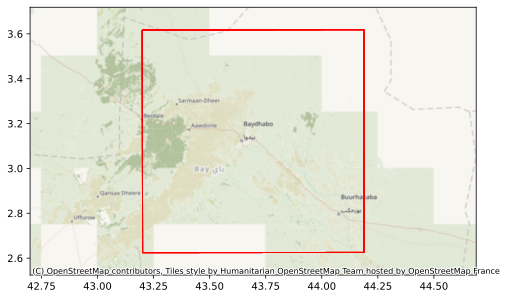

In [11]:
import matplotlib.pyplot as plt
import contextily as ctx

fig, ax = plt.subplots(figsize=(8,8))
df.plot(ax=ax, edgecolor='red', facecolor='none')
ax.set_xlim((df.total_bounds[0]-0.5, df.total_bounds[2]+0.5))
ax.set_ylim((df.total_bounds[1]-0.1, df.total_bounds[3]+0.1))
ctx.add_basemap(ax, crs=df.crs)

In [ ]:
# This is what happens in stackstac.stack

print(type(items_s2))

items_s2 = [item.to_dict() for item in items_s2]

for item_i, item in enumerate(items_s2):
  print(item["properties"])
  item_epsg = item["properties"].get("proj:epsg")
  item_bbox = item["properties"].get("proj:bbox")
  item_shape = item["properties"].get("proj:shape")
  item_transform = item["properties"].get("proj:transform")       

In [ ]:
item

In [ ]:
stack

# Trying downloading approach
- Download S2 tile for a full year
- Slice the data into chunks of 128x128

In [4]:
# Figuring out the tile geometry for tile 32TMT

import planetary_computer as pc 
import stackstac
import rasterio
from rasterio import RasterioIOError
import geopandas as gpd
import os
import pystac_client
from pystac_client.stac_api_io import StacApiIO

# Setup client

URL = 'https://planetarycomputer.microsoft.com/api/stac/v1'

stac_api_io = StacApiIO()
stac_api_io.session.verify = os.environ.get('CURL_CA_BUNDLE')
catalog = pystac_client.Client.open(URL,stac_io=stac_api_io)

# Define what we search

lon_lat = (8.5417, 47.3796) # Zurich, in 32TMT
xy_shape = (128, 128)
resolution = 10
time_interval = "2021-07-01/2021-07-31"

bbox_query = bbox(lon_lat=lon_lat, xy_shape=xy_shape, resolution=resolution)
padded_bbox_query = padded_bbox(bbox_query, xy_shape)

search = catalog.search(
        bbox = padded_bbox_query,
        collections=["sentinel-2-l2a"],
        datetime=time_interval
) # retruns a ItermSearch object (search object of STAC API)


# Query data

items_s2 = pc.sign(search) # will perform serach and return ItemCollection that is signed. GeoJSON FeatureCollection whose features are all STAC Items

metadata = items_s2.to_dict()['features'][0]["properties"]
epsg = metadata["proj:epsg"]

gdal_session = stackstac.DEFAULT_GDAL_ENV.updated(always=dict(session=rasterio.session.AWSSession(aws_unsigned = True, endpoint_url = None)))
bands = ["AOT", "B01", "B02", "B03", "B04", "B05", "B06", "B07", "B08", "B8A", "B09", "B11", "B12", "WVP"]
stack = stackstac.stack(items_s2, epsg = epsg, assets = bands, dtype = "float32", properties = ["sentinel:product_id"], band_coords = False, bounds_latlon = padded_bbox_query, xy_coords = 'center', chunksize = 2048,errors_as_nodata=(RasterioIOError('.*'), ), gdal_env=gdal_session)


# View data
df = gpd.GeoDataFrame.from_features(items_s2.to_dict(), crs="epsg:4326")

print(df.geometry.values[0])

POLYGON ((7.74679447 46.85848226, 7.75899137 46.89329386, 7.81122265 47.03982352, 7.86307925 47.18644212, 7.91601519 47.33279471, 7.96880203 47.47926696, 8.02303537 47.62535896, 8.07674281 47.77162214, 8.10496239 47.84823823, 9.13047036 47.85362771, 9.12805716 46.86562825, 7.74679447 46.85848226))


/home/f80873755@agsad.admin.ch/virtualenvs/10_cropcoveo/lib/python3.11/site-packages/stackstac/prepare.py:408: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


In [5]:
df.geometry.values[0].centroid.x

8.522358515916862

In [2]:
# Query data

specs = {
    "lon_lat": (df.geometry.values[0].centroid.x, df.geometry.values[0].centroid.y), # center pixel (lon-lat)
    "xy_shape": (1024, 1024), # width, height of cutout around center pixel
    "resolution": 10, # in meters.. will use this on a local UTM grid..
    "time_interval": "2021-01-01/2021-01-31",
    "providers": [
        {
            "name": "s2",
            "kwargs": {"bands": ["AOT", "B01", "B02", "B03", "B04", "B05", "B06", "B07", "B08", "B8A", "B09", "B11", "B12", "WVP"], "best_orbit_filter": False, "five_daily_filter": False, "brdf_correction": True, "cloud_mask": False, "aws_bucket": "planetary_computer"}
        }
        ]
}

mc = emc.load_minicube(specs, compute = True)

NameError: name 'df' is not defined

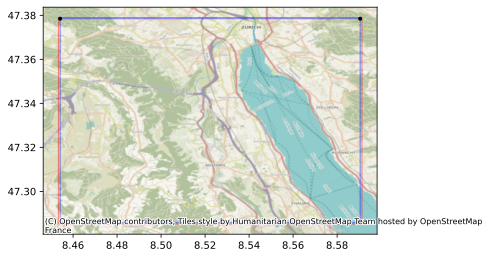

In [7]:
# Compare bbox that is queried and extent of data returned

from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd


bbox_query = bbox(lon_lat=specs["lon_lat"], xy_shape=specs["xy_shape"], resolution=specs["resolution"])
padded_bbox_query = padded_bbox(bbox_query, specs["xy_shape"])


# Create a Polygon from the coordinates
polygon_bbox = Polygon([
    (bbox_query[0], bbox_query[1]),
    (bbox_query[2], bbox_query[1]),
    (bbox_query[2], bbox_query[3]),
    (bbox_query[0], bbox_query[3]),
    (bbox_query[0], bbox_query[1])
])

polygon_padded_bbox = Polygon([
    (padded_bbox_query[0], padded_bbox_query[1]),
    (padded_bbox_query[2], padded_bbox_query[1]),
    (padded_bbox_query[2], padded_bbox_query[3]),
    (padded_bbox_query[0], padded_bbox_query[3]),
    (padded_bbox_query[0], padded_bbox_query[1])
])

# Create a GeoDataFrame with the Polygon
gdf_bbox = gpd.GeoDataFrame({'geometry': [polygon_bbox]}, crs='EPSG:4326')
gdf_padded_bbox = gpd.GeoDataFrame({'geometry': [polygon_padded_bbox]}, crs='EPSG:4326')

# Get extent of the data
point_ul = (mc['lon'].values[0], mc['lat'].values[0])
point_ur = (mc['lon'].values[-1], mc['lat'].values[0])

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(6, 6))
gdf_bbox.plot(ax=ax, alpha=0.5, edgecolor='blue', facecolor='none')
gdf_padded_bbox.plot(ax=ax, alpha=0.5, edgecolor='red', facecolor='none')
plt.plot(point_ul[0], point_ul[1], 'ko', markersize=3)  
plt.plot(point_ur[0], point_ur[1], 'ko', markersize=3)  


# Add contextily background
ctx.add_basemap(ax, crs=gdf_bbox.crs)

plt.show()

In [8]:
polygon_bbox.bounds

(8.454119648747394, 47.28577450355008, 8.590479529354333, 47.378478006755124)

In [9]:
polygon_padded_bbox.bounds

(8.453320665071963, 47.28523131896099, 8.591278513029764, 47.379021191344215)

In [10]:
point_ul

(8.454119648747394, 47.378478006755124)

In [21]:
mc

<xarray.Dataset> Size: 16GB
Dimensions:   (time: 135, lon: 1024, lat: 1024)
Coordinates:
  * time      (time) datetime64[ns] 1kB 2021-01-01 2021-01-04 ... 2021-12-30
  * lon       (lon) float64 8kB 8.454 8.454 8.454 8.455 ... 8.59 8.59 8.59 8.59
  * lat       (lat) float64 8kB 47.38 47.38 47.38 47.38 ... 47.29 47.29 47.29
    angle     <U7 28B 'Zenith'
Data variables: (12/15)
    s2_avail  (time) float32 540B 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    s2_AOT    (time, lat, lon) float64 1GB 0.002838 0.002838 ... 0.002335
    s2_B01    (time, lat, lon) float64 1GB 0.5395 0.5395 ... 0.1848 0.1848
    s2_B02    (time, lat, lon) float64 1GB 0.5269 0.5448 ... 0.2455 0.2506
    s2_B03    (time, lat, lon) float64 1GB 0.5005 0.5142 0.5222 ... 0.247 0.2418
    s2_B04    (time, lat, lon) float64 1GB 0.5107 0.5222 ... 0.2459 0.2319
    ...        ...
    s2_B08    (time, lat, lon) float64 1GB 0.5418 0.5519 ... 0.2522 0.2508
    s2_B8A    (time, lat, lon) float64 1GB 0.54 0.5504 0.5573 ... 0.2245 0.2183
    s2_B09    (time, lat, lon) float64 1GB 0.5922 0.5922 ... 0.2653 0.2653
    s2_B11    (time, lat, lon) float64 1GB 0.429 0.4391 0.4443 ... 0.1954 0.1906
    s2_B12    (time, lat, lon) float64 1GB 0.3652 0.371 0.3748 ... 0.1814 0.1776
    s2_WVP    (time, lat, lon) float64 1GB 0.01088 0.01088 ... 0.01062 0.01062
Attributes:
    history:  Created on 2024-05-15 11:46:40.857521 with the earthnet-minicub...